In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
import compute_S_rate
import auxiliary_functions
import seaborn
import math
import networkx as nx

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


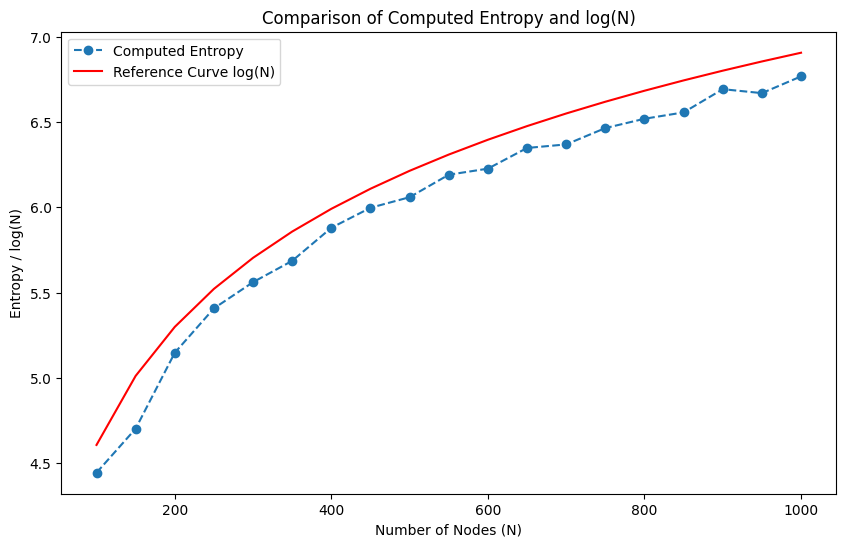

In [2]:
lamda = 1
N_values = np.arange(100, 1001, 50)
entropies = []
log_N_values = []
c = 5
t = 100 # t = 2 * 1 / log(N)
time = [i for i in np.linspace(0,100,2)]


for N in N_values:
    p = c / N
    er_adj = nx.adjacency_matrix(nx.erdos_renyi_graph(N, p))
    er_rw = StaticTempNetwork(times = time, adjacency = csr_matrix(er_adj))
    er_rw.compute_laplacian_matrices(random_walk = True)

    er_rw.compute_inter_transition_matrices(lamda=1, dense_expm=False, use_sparse_stoch=False)
    er_rw.compute_transition_matrices(lamda=1)

    H_er_rw = compute_S_rate.compute_conditional_entropy(net=er_rw, list_T=er_rw.T[1], lamda=1, force_csr=True, time_domain= list(np.arange(len(time)-2, len(time)-1)))
    entropies.append(H_er_rw[list(H_er_rw.keys())[0]][-1])
    log_N_values.append(np.log(N))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(N_values, entropies, label="Computed Entropy", linestyle='--', marker='o')
plt.plot(N_values, log_N_values, label="Reference Curve log(N)", linestyle='-', color='r')
plt.xlabel("Number of Nodes (N)")
plt.ylabel("Entropy / log(N)")
plt.title("Comparison of Computed Entropy and log(N)")
plt.legend()
plt.savefig('/home/b/skoove/Desktop/plots_entropy/approximation_asymptot_er.png', format='png', dpi=300)
plt.show()